# <span style='color:red'>Quantitative Investing with Python</span>

### Professor Juhani Linnainmaa

Dartmouth College and Kepos Capital

--- 

## **Learning objective:**

- Working knowledge of quantitative investing: **how to construct and backtest trading strategies**
  - Applied to factor investing (= alternative risk premiums)
  - Brief introduction to the ideas in machine learning/statistical arbitrage 

## **Goals:**

1. Basics of using Python 
   - Python coding is often done in an IDE such as PyCharm/VSCode or in **Jupyter notebooks**
   - Jupyter notebooks are convenient in that you can write notes and code side by side and, because code is executed in steps, debugging is easy
   - We can write standalone 'scripts' or larger projects that consist of multiple files
     - Python files typically have .py extensions; notebooks have .ipynb extensions
   - We will use Jupyter Lab through Dartmouth's own system at jhub.dartmouth.edu
   - The goal is to get you up and running to the point where you know where to look up more information
   - **If** you work in an organization that uses Python, there would likely be a common codebase (repository) maintained with git or svn <br><br>


2. Loading and analyzing financial data
   - Get data from public sources using APIs as well as from commonly used databases (CRSP and Compustat)
   - Explore data <br><br>

3. Construct academic factors
   - Understanding the decisions made for constructing factors
   - Examine sensitivity to the strategy rules: when you construct a trading rule, you have to make many decisions about *what* and *how* you trade
   - Construct additional factors <br><br>


4. Predict stock returns and trade these predictions
   - Overfitting

## **Learning method:**

- Learn by doing: we write and modify some code to understand how things can be done and give ideas of what is possible

## **Jhub:**

- You can keep all your files in JHub for the duration of the course
- **Except** for the folder ```Shared```, no one else has access to the files you have on JHub
- You can create a directory structure that suits you
- You can access the course files that I post using the ```Shared``` folder
  - To make and save edits, you **must** copy these files somewhere else
    
## **On the Use of LLMs**

- Large Language Models, such as ChatGPT and Claude, are extremely useful in coding and learning to code
- If you can describe what you're trying to do, you can often get functioning code
  - Or, if your code doesn't work, you can paste in the code and the error, and these tools can often pinpoint the error
- Even if you know how to code, these tools can teach you new approaches and increase your productivity 
- If you want to understand how some code works, you can also paste the code into the chat and ask for clarification and/or additional examples
- I use LLMs all the time in my work to:
  1. figure out quickly how to use some new package, 
  2. write code that is simple but it is faster the explain to the LLM what I want written instead of writing it myself
  3. when I want to verify that I'm not ignoring some edge cases
  4. when I want to learn if there is a faster/cleaner/better way of doing something    

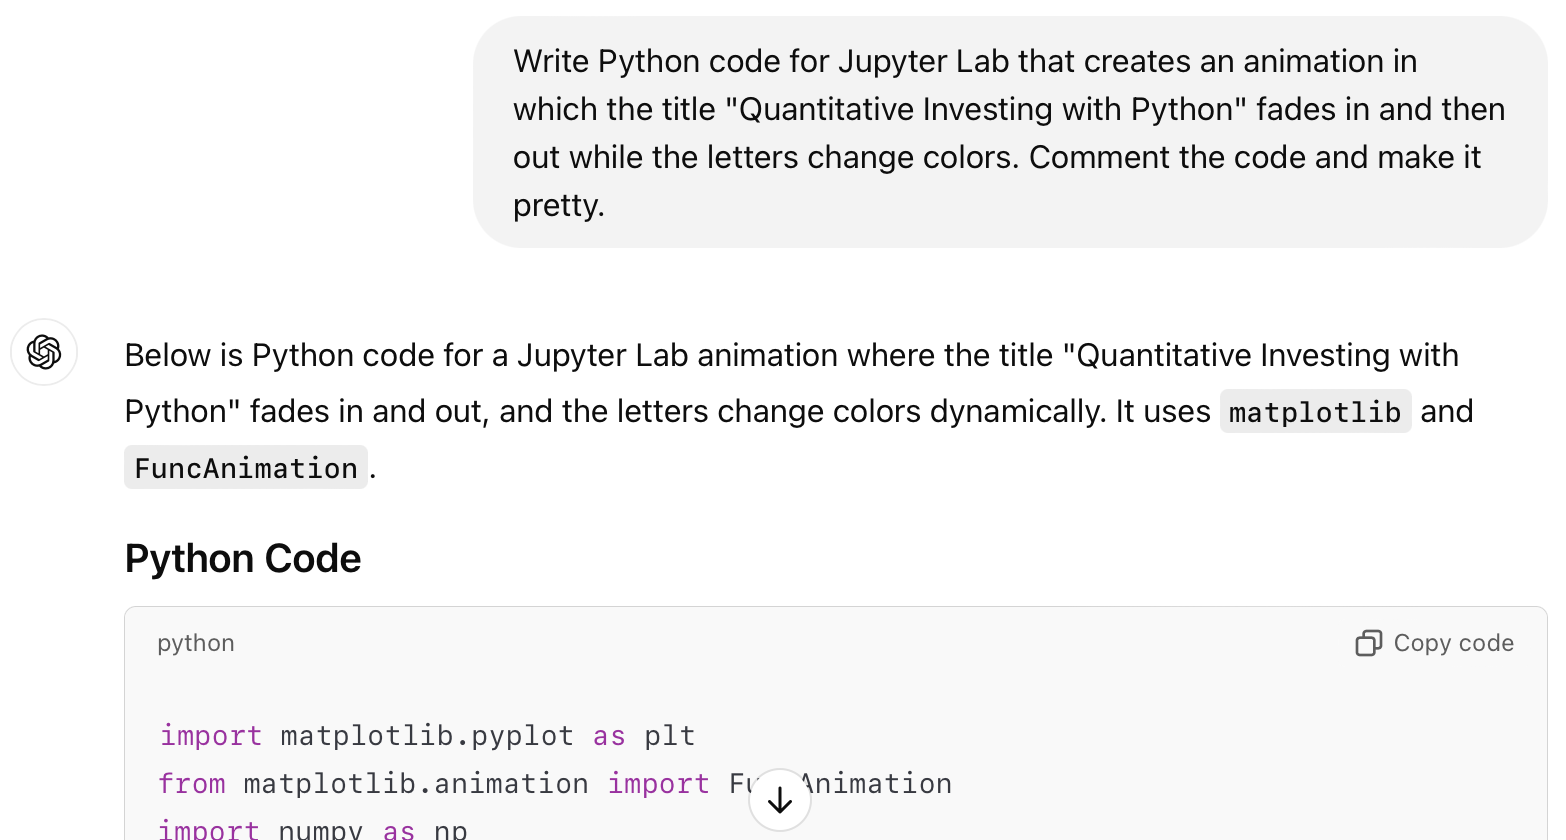

Here is the code that ChatGPT 4o served me (after I asked it to fix a clipping issue):

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")  # Turn off the axes for a clean look

# Title text
title_text = "Quantitative Investing with Python"

# Calculate the starting position to center the text
start_x = 0.5 - (0.02 * (len(title_text) - 1)) / 2  # Adjust based on character width and count

# Create the text object with individual letters
text_objects = [
    ax.text(start_x + i * 0.02, 0.5, char, fontsize=20, ha="center", va="center", alpha=0)
    for i, char in enumerate(title_text)
]

# Color palette to cycle through for letters
colors = plt.cm.viridis(np.linspace(0, 1, len(title_text)))

# Define the update function for the animation
def update(frame):
    """
    Update function for the animation.
    Handles fading and color-changing effects for the title.

    Parameters:
        frame: The current frame number in the animation.
    """
    alpha = frame / 50 if frame <= 50 else (100 - frame) / 50  # Fade-in/out effect
    for i, text in enumerate(text_objects):
        # Set the alpha for fade effect
        text.set_alpha(alpha)
        
        # Cycle through colors for each frame
        color_index = (frame + i) % len(colors)
        text.set_color(colors[color_index])
    return text_objects

# Create the animation
anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Display the animation in Jupyter Lab
from IPython.display import HTML
HTML(anim.to_jshtml())

# **Topic 1:** Getting Familiar with Python

## Working with Jupyter notebooks

A <span style='color:red'>Jupyter notebook</span> consists of cells

There are two types of cells: code and markdown

When we work with notebooks, we create, delete, and modify cells and execute code in those cells

We are either in **edit** or **command** mode
- In the EDIT mode you are inside a cell with a blinking cursor
- In the COMMAND mode you are outside the cell
- You can move from the COMMAND mode to EDIT mode by hitting ENTER; you move from EDIT model to COMMAND mode by hitting ESC

Here are some of the keyboard shortcuts in the **command** mode:

- Up- and down-arrows: move up and down between cells
- A: create a new cell above
- B: create a new cell below
- X: delete cell
- Z: undo (e.g., undelete cell)
- M: convert a CODE cell into a MARKDOWN cell 
- Y: convert a MARKDOWN cell into a CODE cell

To execute code, press CTRL + ENTER in either mode

## Background on Python

When you start a new Python session, there is nothing (except basic Python) in the memory
- This is true even if you open an old notebook that has code in it

When we run code in cells, objects get defined and they remain in memory

There is a counter next to each cell that has been executed to indicate the execution order

You can clear the memory by **restarting the kernel**
- Each notebook (if you have many open) has its own kernel

If you execute code and want to force it to stop, you can **interrupt the kernel**
- Execution breaks but memory isn't cleared (but whatever *was* executed has altered the objects in memory---interrupting the kernel doesn't unwind memory)

## Object-oriented programming language 

Python is object oriented programming language
- This means that most of the things in the language are objects with their own properties and methods
- What does this mean?
  - If we have list of numbers, we (typically) would **not** call a separate function to add an element to that list
  - That is, Python code typically doesn't look like this:
 
    ```
    MY_LIST = [1, 2, 3]
    MY_LIST = ADD_ITEM(MY_LIST, 4)
    ```
    <br>    
  - Rather, if you have a list, the list object itself has a number of methods for doing things to it, such as appending a new element:
 
    ```
    MY_LIST = [1, 2, 3]
    MY_LIST.append(4)
    ```
    <br>        
- There is a thing in Python about modifying objects **in place** versus returning a copy. Append modifies in place.
  - If you load one database into memory, you can have 10 variables in memory that each "point" to the same underlying data---that is, you're not duplicating the data
- If you haven't done OOP, just go with it and it'll make sense/click at some point 

## Extending basic Python

When you start a new session, Python comes in with certain basic set of commands 

However, we typically want to extend functionality by bringing in additional functions written by others

Almost every Python example that you see starts with a bunch of **import** statements, such as 

```
import numpy as np
import pandas as pd
```

I'll come back to the meaning of these statements after introducing some basics

- To see what methods an object has, write [object]. and press tab
  - You can also use this to autocomplete

- To see information about objects and "docstring" (i.e., the user manual), write object? or object??
  - You can also see a function's signature by pressing SHIFT+TAB inside the parentheses

## Introduction

- We can define variables to contain (or, rather, refer to) single numbers, lists of numbers, arrays (vectors and matrices) or data
- There are many different object types in Python
- We have the first code cell below
  - If we want to add comments into a code block, we can do so by putting the # symbol before the comment
  - If we want to have longer comments, we use triple quotation marks 

In [ ]:
# Strings: Define a string and print it

x = 'Hello world!'
print(x)

# Define another string -- Python does both single and double-quotation marks
y = "Hello world, again!"
print(y)

# Why? You might want to have quotes inside a string (more easily) or you might need to have some Python code inside the string
z = 'Here is a "quote" from someone'
print(z)

In [ ]:
# Integers and Floats

x = 1
y = 1.7

print(x+y)

In [ ]:
# List is a list of multiple objects, e.g., strings or number. It is indicated by square brackets.

L = [1, 2, 3, 10, 27]
print(L)

In [ ]:
# Tuple is a list-like object that cannot be changed (mutated) after its created. 
# Indicate by parentheses ()
# This means that it can be used in places where a list wouldn't work (e.g., as a dictionary key)

my_list = [1, 2, 3]
print('My original list: ', my_list)

my_list[1] = 99
print('\nMy updated list: ', my_list)

my_tuple = (1, 2, 3)
print('\nMy original tuple: ', my_tuple)

print('\nTrying to change my tuple will give an error:')

#my_tuple[1] = 99

In [ ]:
my_tuple

In [ ]:
# Dictionary is a "list" of key-value pairs. The values can be accessed by using the key

D = {'student1': 'John',
     'student2': 'Mary',
     'student3': 'Michael',
     'student4': 'Alice'}

print(D['student1'])
print(D['student3'])

- There are many small things that are specific to Python
- The simple things are easy to learn and if you've done any coding, the logic is the same as always
- But there are lots of small things:
  - += and -=
  - Variables: by reference or create a new variable? 
  - f-strings (formatted strings)
  - The use of indentation in if-else and loops
  - Iterating and generators 
  - Unpacking 
  - Indexing starts at zero and we stop before the stop value
  - List comprehensions
  - Lambda functions
  - Ternary expressions
- What makes learning Python is a bit tricky is that when you read code, you'll inevitably run into all these "small things" -- and it is easy to get lost
  - Moving to larger scale projects, there are classes and class inheritances that would need some studying to understand

In [ ]:
# By reference

a = [1, 2, 3]
b = a
c = a.copy()

print(f'{a=} and {b=} and {c=}')

a += [5]

print(f'{a=} and {b=} and {c=}')

print('both a and b refer to the same object, c is its own object because we created a copy of it!')

In [ ]:
# There is no *end* or {} brackets in if-else statements. We indent to indicate the start and end of the if-else block.
# elif stands for "else if"
#
# Indentation is very important in Python

a = 3

if a==1:
    print('Number one')
elif a==2:
    print('Number two')
elif a==3:
    print('Number three')
else:
    print('Something else')

In [ ]:
# We often iterate (go through, item by item) through, e.g., lists

# You can imagine how this can be useful for processing multiple days, multiple stocks, multiple trading rules, etc.

# Note that in Python we don't have create a loop and then access the elements; the loop automatically stops when we've looped through all items

my_list = [1, 1, 2, 3, 5, 8, 13]

for item in my_list:
    print(item)

In [ ]:
# We can define 'generators' that we can then iterate to yield values one by one; 
# this is like the list above, "generating" new values as we call it
# "range" is one of these generators
# we need to specify the STOP value.

my_range = range(10)
for r in my_range:
    print(r)

print('Note that the list starts at 0 and it stops BEFORE it sees the STOP value of 10')

In [ ]:
# List comprehensions is popular Python feature for creating lists (or dictionaries) without having to loop
# Any time you want to create a list of something based on some rule (take out some letters, apply some 
# transfomration, add something, filter based on some rule...) you can probably use list comprehensions

# If you haven't seen these before, they will take a while to get used to. But they are a very
# powerful tool

# If I want to create a list that says Student_1, Student_2,..., Student_10, I could write:

student_list = ['Student_' + str(n) for n in range(1,11)]
print(student_list)

In [ ]:
# If I have a list of numbers and want to pick just the numbers *not* divisible by three:

my_list = list(range(1,51))
print('My numbers: ', end='')
print(my_list)

not_by_three = [n for n in my_list if not (n % 3) == 0]

print('\nTake out the numbers not divisible by three: ', end='')
print(not_by_three)

### Functions

- Functions are defined with ```def <function_name>```
  - Functions typically take something as an input, do something, and then (often) return something
  - Functions are important for keeping the code clean and making it reusable
- Functions can have "positional" or "keyword" arguments (a positional argument is identified by its position, a keyword argument has a name)
- Similar to other blocks, the beginning and end are identified with indentation
- Function is just another object in the memory

In [ ]:
def add_exclamation_mark(input_str):
    output_str = input_str + "!"
    return output_str

In [ ]:
print('Write something and press enter:')
my_input = input('-> ')

print('\nYou wrote: ' + my_input)

output = add_exclamation_mark(my_input)

print('\nHere is what we get after applying the function: ' + output)


### Lambda functions are for convenience for creating small 'anonymous' functions

- They have a weird syntax -- before you get used to it
- Lambda functions are useful when you need to do some transformation on the fly (e.g., list comprehensions, applying something to every value in your data, etc.)
- **Key thing to remember at first**: when you see "lambda", it means that some function is being created on the fly for one-off use 
  - We *can* use lambda to define named functions (as I do below), but they are typically used when the function is really simple and we only need it once

In [ ]:
add_question_mark = lambda input_str: input_str + '?'

In [ ]:
print('Write something and press enter:')
my_input = input('-> ')

print('\nYou wrote: ' + my_input)

output = add_question_mark(my_input)

print('\nHere is what we get after applying the (lambda) function: \n\n' + output)

A typical example of using lambda functions is when we sort something or process data. Here is an example in which we sort data, using a lambda function to create the ```key``` by which we sort on the fly

- Below, create a dictionary of four people with their ages
- Suppose we want to list these people by their names OR ages

In [ ]:
unsorted_people = [('Bob', 25), ('Alice', 30), ('Cindy', 10), ('Daphne', 37)]

print('Sort by name:')
print(sorted(unsorted_people, key=lambda x: x[0]))

print('\nSort by age:')
print(sorted(unsorted_people, key=lambda x: x[1]))

### Unpacking lists and tuples

- Unpacking refers to extracting values from lists etc. and assigning them into different variables
- There is a special unpacking * operator that is used in different places in Python. Below, I use it to get "everything in the middle"

In [ ]:
my_list = [1, 8]
a, b = my_list
print(f'{a=} and {b=}')

my_other_list = [1, 2, 3, 4, 5, 8]
a, *b, c = my_other_list

print(f'{a=} and {b=} and {c=}')

# Expanding capabilities by importing packages

- When you start Python, it comes with a limited set of functions
- However, even base Python includes many other functions but they have to be imported
- We don't want to have a system that has everything in it -- it would "pollute the namespace" and create overhead
- We typically just import what we need
- Python code typically begins with a block of import statements
  - When you write code, you realize you need something else and then you add that to the list of packages you import
  
#### Details

- We can import everything from a package (don't), we can import the package with some alias (so that everything can be accessed through that alias), or we can import specific functions from a package
- Typical packages as numpy (for matrices and math) and pandas (for data science). We often import datetime function from datetime package
- So we could have the following:

#### Explanations for the three import commands in the code below:

1. ```numpy``` is a popular package for doing most things math-related.
   - we *could* just write ```import numpy``` after which we would have a function such as ```array``` in the memory
   - but, again, importing an entire package like this is a bad idea
   - instead, we import ```numpy``` and give it the name ```np```. So when we want to refer to its ```array``` function, we write ```np.array```<br><br>
  
2. ```pandas``` is a popular package for doing things related to data, in particular in finance
   - it defines new object types ```Series``` and ```DataFrame``` that are useful for containing and manipulating data<br><br>
  
3. ```datetime``` is a simple package for things related to dates

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

A = np.array([[1, 2, 0], [4, 5, 6], [7, 8, 9]])

print('Original matrix:')
print(A)
print('\nInverse of the matrix:')
print(np.linalg.inv(A))

df = pd.DataFrame({'col a': [1, 2, 3], 'col b': [10, 11, 12]})
print('\nA dataframe:')
print(df)
print('\n')

print(datetime(2023,9,23))

### Getting some Financial Data

Yahoo Finance offers an API for pulling financial data

We have it installed in ```JHub``` but if you were to run Python locally, you probably would not have this package as part of your installation

If so, you would need to install it. You can do so in Jupyter Lab (or Notebook) by writing and then executing:


```pip install yfinance```

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbols for Apple and Google
ticker_symbols = ['AAPL', 'GOOGL']

# Define the start and end dates for the data
end_date = datetime.today()
start_date = end_date - timedelta(days=5 * 365)  # Five years ago

# Download the data for each stock
stock_data = yf.download(ticker_symbols, start=start_date, end=end_date)

# Print the first few rows of the downloaded data
print(stock_data.head())